<a href="https://colab.research.google.com/github/mdavistr-cmu/Davis-Troller_DSPN_S25/blob/main/ExerciseSubmissions/Davis-Troller_Exercise11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/the-beauty-of-knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 11: The beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


1. data plotting and train/test sets 2/2
2. knn 3/3
3. for loop 3/3: should only use carat & depth features for this section
4. standardizing predictors 2/2

## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


[1] 3932.8


Below Mean Above Mean 
     34283      19657 

carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,Below Mean
0.21,59.8,61,3.89,3.84,Below Mean
0.23,56.9,65,4.05,4.07,Below Mean
0.29,62.4,58,4.20,4.23,Below Mean
0.31,63.3,58,4.34,4.35,Below Mean
0.24,62.8,57,3.94,3.96,Below Mean


[1] 53940     6

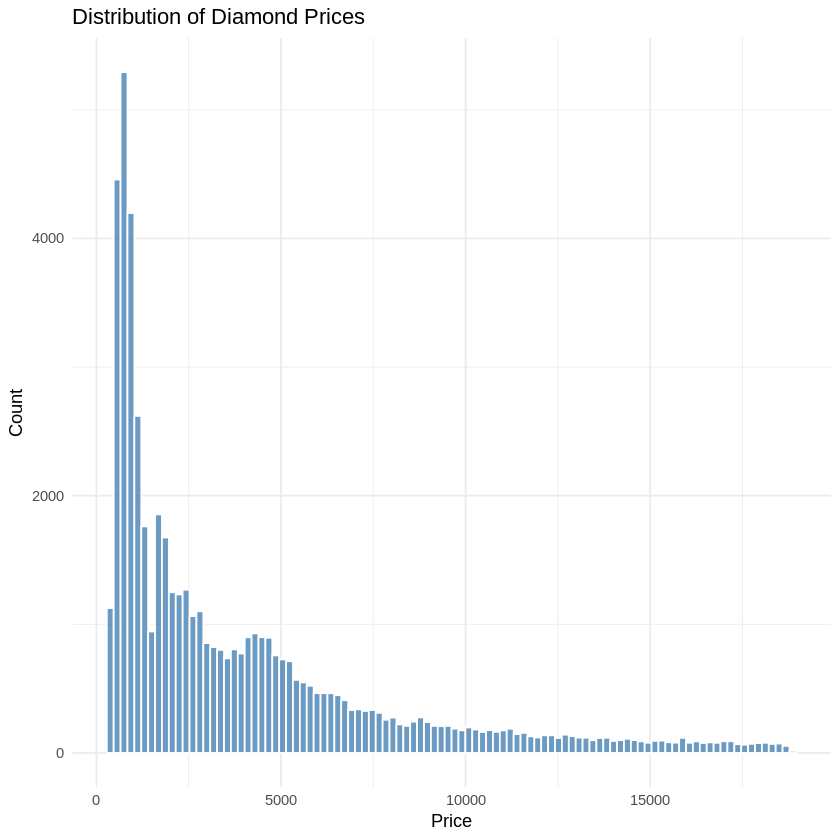

In [ ]:
library(class)
library(tidyverse)

d <- diamonds
ggplot(diamonds, aes(x = price)) +
  geom_histogram(bins = 100, fill = "steelblue", color = "white", alpha = 0.8) +
  labs(title = "Distribution of Diamond Prices", x = "Price", y = "Count") +
  theme_minimal()

mean(d$price)
d <- d %>%
  mutate(price_bin = if_else(price > mean(price), 1, 0),
         price_bin = factor(price_bin, levels = c(0, 1),
                            labels = c("Below Mean", "Above Mean")))
table(d$price_bin)

d <- d %>%
  select(carat, depth, table, x, y, price_bin)

head(d)
dim(d)




### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price.

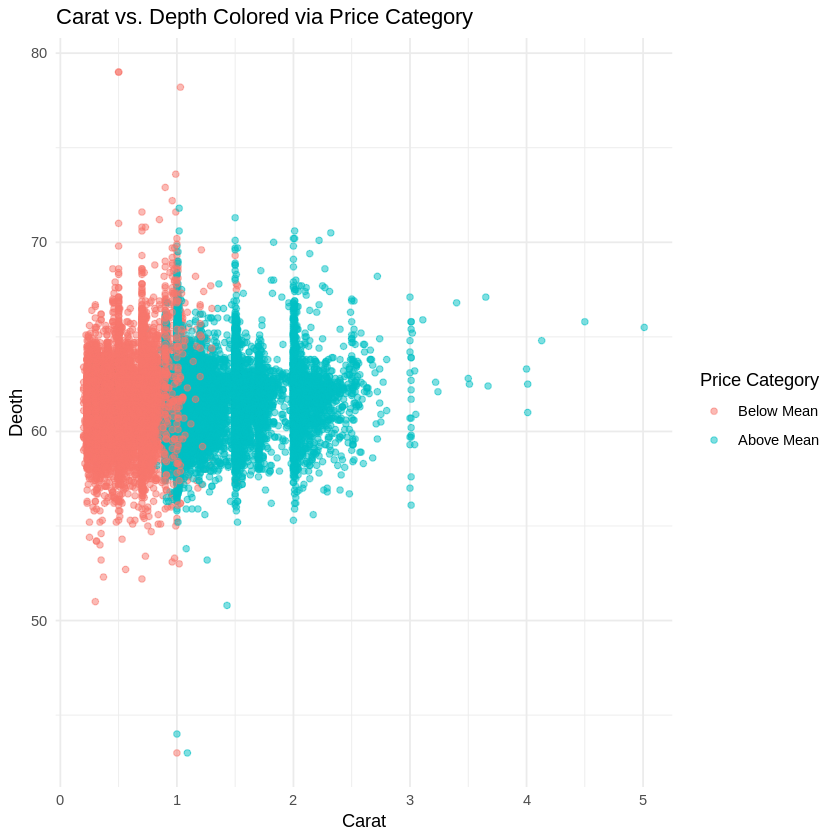

In [ ]:
ggplot(d, aes(x=carat, y=depth, color=price_bin))+
  geom_point(alpha = 0.5) +
  labs(title = "Carat vs. Depth Colored via Price Category",
    x = "Carat",
    y = "Deoth",
    color = "Price Category") +
  theme_minimal()


Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict the diamond? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> Carat is much more informative about price class. Larger carat generally means higher price, while depth provides less signal with no clear distinction.
> kNN would do alright but not great given that there is only one strong predictor.


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [ ]:
set.seed(2023)

n <- nrow(d)
test <- sample(1:n, size = 0.3*n)

testSet <- d[test,]
trainSet <- d[-test,]

head(testSet)
table(testSet$price_bin)
head(trainSet)
table(trainSet$price_bin)

cat("Train Set Dimensions: ", dim(trainSet), "\n")
cat("Test Set Dimensions: ", dim(testSet), "\n")





carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.22,62.3,56.0,6.81,6.84,Above Mean
1.57,62.3,56.0,7.48,7.41,Above Mean
1.11,62.4,57.7,6.57,6.64,Above Mean
0.42,60.6,57.0,4.82,4.85,Below Mean
0.32,62.6,55.0,4.39,4.36,Below Mean
0.90,62.7,58.0,6.06,6.15,Above Mean



Below Mean Above Mean 
     10246       5936 

carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,Below Mean
0.23,56.9,65,4.05,4.07,Below Mean
0.29,62.4,58,4.20,4.23,Below Mean
0.31,63.3,58,4.34,4.35,Below Mean
0.24,62.8,57,3.94,3.96,Below Mean
0.24,62.3,57,3.95,3.98,Below Mean



Below Mean Above Mean 
     24037      13721 

Train Set Dimensions:  37758 6 
Test Set Dimensions:  16182 6 


## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`.

*Hint: Review the format required for the arguments of knn()*

In [ ]:
set.seed(2023)
library(class)


trainX <- trainSet[, c("carat", "depth")]
testX <- testSet[, c("carat", "depth")]

trainY <- trainSet$price_bin
testY <- testSet$price_bin

knn_pred <- knn(train = trainX, test = testX, cl = trainY, k = 3)


head(knn_pred)





[1] Above Mean Above Mean Above Mean Below Mean Below Mean Above Mean
Levels: Below Mean Above Mean

Now, output a confusion matrix and calculate the test error to evaluate model performance.

In [ ]:

confMatrix <- table(Predicted = knn_pred, Actual = testY)
print(confMatrix)

test_error <- 1 - mean(knn_pred == testY)
cat("Test Error: ", test_error)

            Actual
Predicted    Below Mean Above Mean
  Below Mean       9707        316
  Above Mean        539       5620
Test Error:  0.05283648 


How did your model perform?
> It performed well. It had an accuracy of 95%. There were 539 false negatives and 316 false positives out of a total of about 16,100 observations.


Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [ ]:
set.seed(2023)


trainX2 <- trainSet[, c("carat", "depth","table","x","y")]
testX2 <- testSet[, c("carat", "depth","table","x","y")]

trainY2 <- trainSet$price_bin
testY2 <- testSet$price_bin

knn_pred2 <- knn(train = trainX2, test = testX2, cl = trainY2, k = 3)


head(knn_pred2)

confMatrix2 <- table(Predicted = knn_pred2, Actual = testY2)
print(confMatrix2)

test_error2 <- 1 - mean(knn_pred2 == testY2)
cat("Test Error: ", test_error2)


[1] Above Mean Above Mean Above Mean Below Mean Below Mean Above Mean
Levels: Below Mean Above Mean

            Actual
Predicted    Below Mean Above Mean
  Below Mean       9728        391
  Above Mean        518       5545
Test Error:  0.05617353 


Did your model predictions improve?
> No, my model predictions essentially stayed the same. There were actually a few more errors as there was an increase in errors by 0.4%.


# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy.

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`.

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [ ]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


In [ ]:
trainX2 <- trainSet[, c("carat", "depth","table","x","y")]
testX2 <- testSet[, c("carat", "depth","table","x","y")]

trainY2 <- trainSet$price_bin
testY2 <- testSet$price_bin



for (k in seq(1:30)) {
    knn_fits  <- knn(train = trainX2, test = testX2, cl = trainY2, k = k)
    conf_df  <- table(Predicted = knn_fits, Actual = testY2)
    output$error[k]  <- 1 - sum(diag(conf_df)) / sum(conf_df)

}


output

k,error
<int>,<dbl>
1,0.06488691
2,0.06488691
3,0.05617353
4,0.05543196
5,0.05308367
6,0.05376344
7,0.05283648
8,0.05234211
9,0.05184773


Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer.

`geom_smooth()` using formula = 'y ~ x'


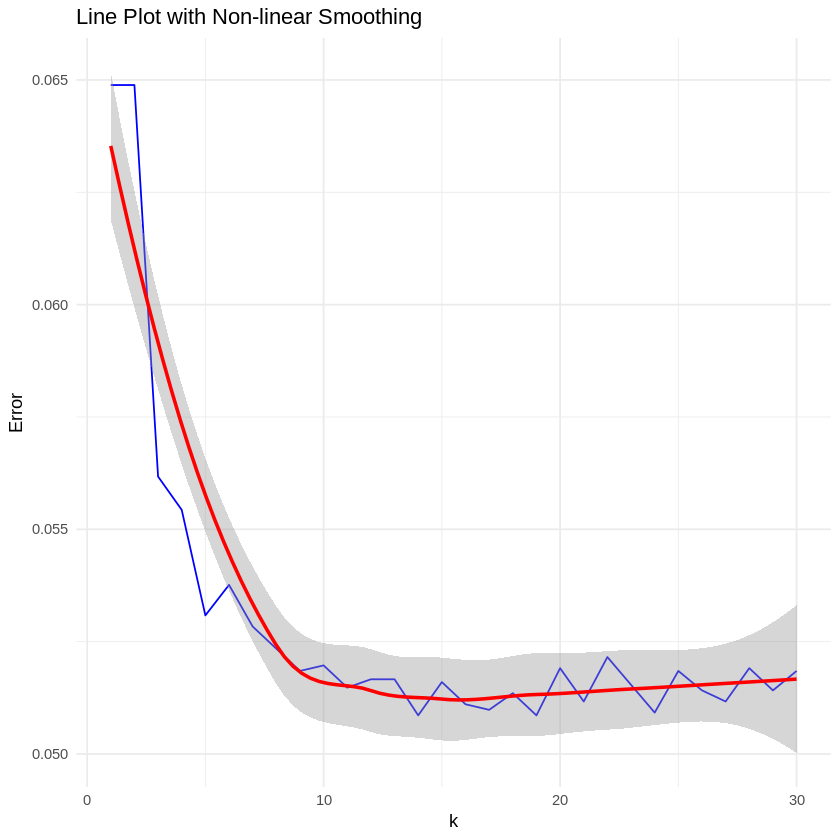

In [ ]:
ggplot(output, aes(x = k, y = error)) +
  geom_line(color = "blue") +
  geom_smooth(method = "loess", se = TRUE, color = "red") +  # Non-linear smooth
  theme_minimal() +
  labs(title = "k vs. Error",
       x = "k",
       y = "Error")


Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> The best value of k is 11. It's at the beginning of the asymptote of the graph. This improves my test error from 0.05617353 to 0.05147695 with an overall increase of 0.47%.


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [ ]:
set.seed(2023)
d <- d %>%
  mutate(carat_scaled = scale(carat),
         depth_scaled = scale(depth))

head(d)


n <- nrow(d)
test <- sample(1:n, size = 0.3*n)

testSet <- d[test,]
trainSet <- d[-test,]


cat("Train Set Dimensions: ", dim(trainSet), "\n")
cat("Test Set Dimensions: ", dim(testSet), "\n")

trainX3 <- trainSet[, c("carat_scaled", "depth_scaled")]
testX3 <- testSet[, c("carat_scaled", "depth_scaled")]

trainY3 <- trainSet$price_bin
testY3 <- testSet$price_bin

knn_pred3 <- knn(train = trainX3, test = testX3, cl = trainY3, k = 11)


head(knn_pred3)


confMatrix3 <- table(Predicted = knn_pred3, Actual = testY3)
print(confMatrix3)

test_error3 <- 1 - mean(knn_pred3 == testY3)
cat("Test Error: ", test_error3)



carat,depth,table,x,y,price_bin,carat_scaled,depth_scaled
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>"
0.23,61.5,55,3.95,3.98,Below Mean,-1.198157,-0.1740899
0.21,59.8,61,3.89,3.84,Below Mean,-1.240350,-1.3607259
0.23,56.9,65,4.05,4.07,Below Mean,-1.198157,-3.3849872
0.29,62.4,58,4.20,4.23,Below Mean,-1.071577,0.4541292
0.31,63.3,58,4.34,4.35,Below Mean,-1.029384,1.0823482
0.24,62.8,57,3.94,3.96,Below Mean,-1.177060,0.7333376


Train Set Dimensions:  37758 8 
Test Set Dimensions:  16182 8 


[1] Above Mean Above Mean Above Mean Below Mean Below Mean Above Mean
Levels: Below Mean Above Mean

            Actual
Predicted    Below Mean Above Mean
  Below Mean       9708        293
  Above Mean        538       5643
Test Error:  0.05135336 


What impact did rescaling the data have on your error rate?
> It stayed pretty much the same. The scale probably would've had a greater effect had it been implemented at k=3.


**DUE:** 11:59 pm March 19, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> Me, myself, and I
>
>
